# Regresja liniowa – wykład

## Przypomnienie: KNN i głośność mieszkań

Na ostatnim wykładzie poznaliśmy algorytm KNN. Umieliśmy dzięki niemu rozpoznać, czy mieszkanie jest **ciche** czy **głośne**.

Ale co, jeśli chcielibyśmy wiedzieć **nie tylko czy jest głośno**, ale **jak bardzo**?

Na przykład: _"Ile decybeli hałasu dochodzi do mieszkania?"_

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(44)
num_samples = 300
num_clusters = 10

x_blob, _ = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=6,
                       center_box=(0, 100), random_state=44)
x_coords = np.clip(x_blob[:, 0], 0, 100)
y_coords = np.clip(x_blob[:, 1], 0, 100)

base_noise = 80
decibels = base_noise + (
    10 * np.sin(x_coords / 10) +
    10 * np.cos(y_coords / 10) +
    np.random.normal(0, 2, num_samples)
)
decibels = np.clip(decibels, 45, 85)

## KNN jako klasyfikator przedziałów

Możemy spróbować użyć KNN do przewidywania hałasu, **dzieląc poziom dB na przedziały**:

- 45–50 dB  
- 50–55 dB  
- 55–60 dB  
- ...

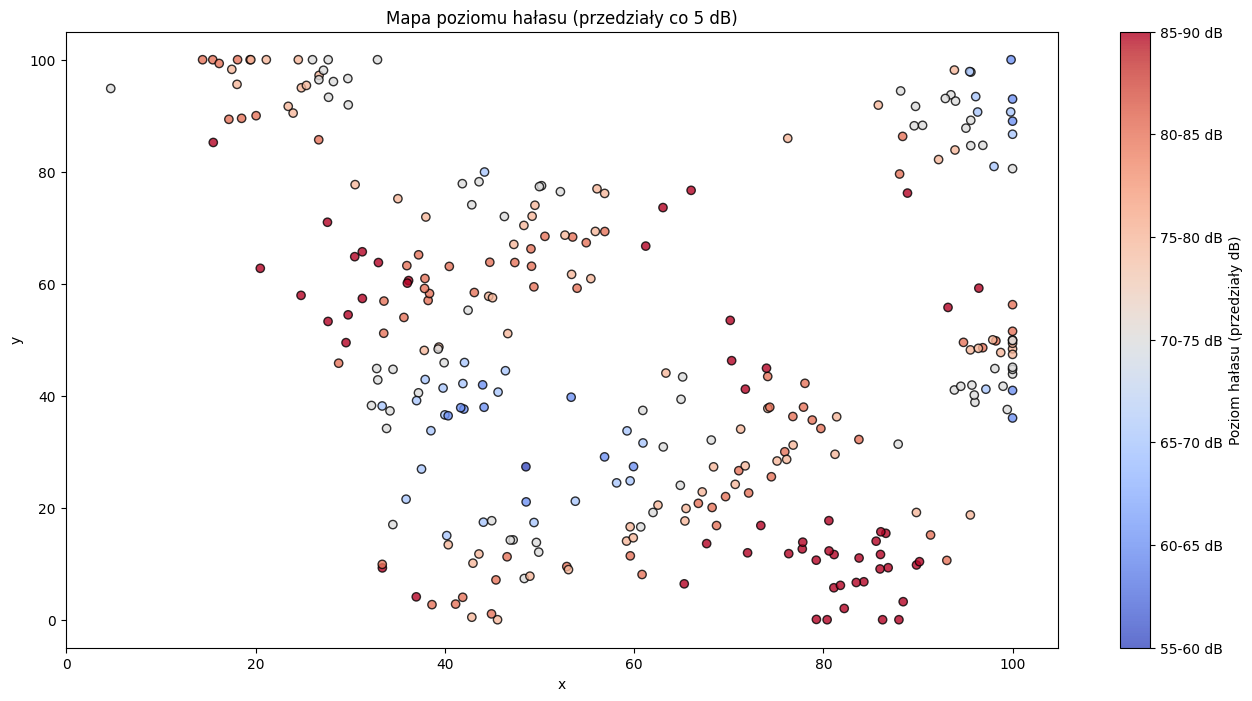

In [4]:
bins = np.arange(45, 90, 5)
decibel_classes = np.digitize(decibels, bins, right=False)

plt.figure(figsize=(16, 8))
scatter = plt.scatter(x_coords, y_coords, c=decibel_classes, cmap='coolwarm', edgecolors='k', alpha=0.8)
cbar = plt.colorbar(scatter, ticks=np.arange(1, len(bins)+1))
cbar.ax.set_yticklabels([f"{b}-{b+5} dB" for b in bins])
cbar.set_label("Poziom hałasu (przedziały dB)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa poziomu hałasu (przedziały co 5 dB)")
plt.show()

## Jak długo możemy to dzielić?

Im więcej przedziałów, tym więcej klas. Ale wtedy:
- trudniej dobrać sąsiadów,
- klasy robią się bardzo podobne,
- a wynik nie jest już liczbą, tylko etykietką...

### Rozwiązanie: **regresja liniowa**!

## Czym jest regresja liniowa?

To bardzo prosty model, który dopasowuje **linię prostą** do danych.

Szuka wzoru:

$$
y = ax + b
$$

Model: y = 40.10 * x + -0.14


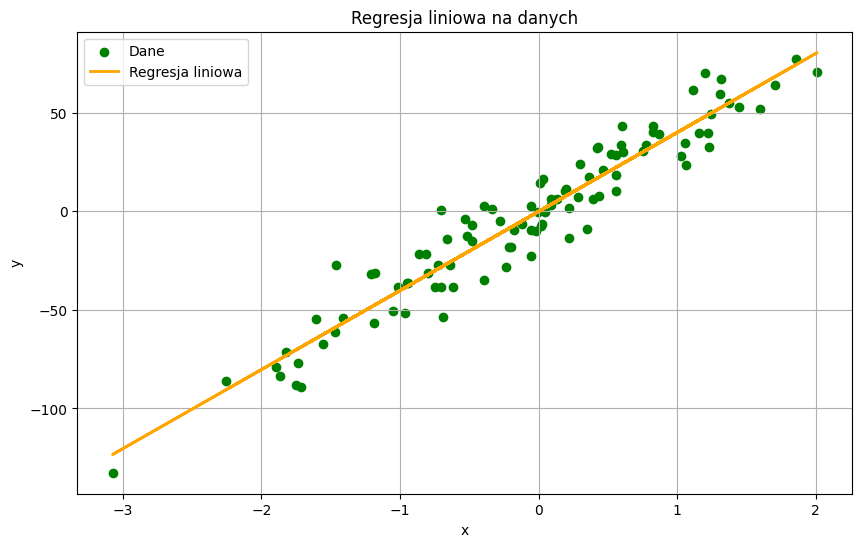

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=44)

model = LinearRegression()
model.fit(X, y)

# 3. Wyciągamy parametry
a = model.coef_[0]
b = model.intercept_
print(f"Model: y = {a:.2f} * x + {b:.2f}")

# 4. Wizualizacja
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Dane')
plt.plot(X, model.predict(X), color='orange', linewidth=2, label='Regresja liniowa')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa na danych")
plt.legend()
plt.grid(True)
plt.show()

## Liczymy to sami!

$$
a = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} \quad \text{i}
$$
$$
\quad b = \bar{y} - a \cdot \bar{x}
$$

## Ciekawostka: macierze!

Pamiętacie **mnożenie macierzy**?

W regresji też to robimy! Zobaczmy, że każdą funkcję możemy zapisać jako:
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta}
$$
i ogólny wzór na parametry modelu to:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

## Podsumowanie

- Regresja liniowa to sposób na przewidywanie liczb.
- Działa podobnie jak KNN, ale **zamiast klasy, zwraca liczbę**.
- Możemy ją policzyć ręcznie lub za pomocą biblioteki.
- W tle działa prosta matematyka: średnie, różnice, mnożenie macierzy.